**NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases)** 
research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.

The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.

**Data Analysis, Descriptive Analysis and EDA ( Project Work- week 1 )**

**Import the Library**

In [ ]:
# Import the Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#load the dataset
from google.colab import files
uploaded= files.upload()

In [ ]:
#Read the csv file with pandas .read_csv file mrthod.
load_data= pd.read_csv("/content/health care diabetes.csv")

In [ ]:
load_data_fresh= pd.read_csv("/content/health care diabetes.csv")

In [ ]:
#check the first 5 rows from the dataset
load_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#check the first 5 rows from the dataset
load_data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
#shape
load_data.shape

(768, 9)

In [ ]:
#describe shows five point summary
load_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#check null 
load_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#check all info
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Insights from Descriptive Analysis**

There is 768 observations of 9 variable. Independent variables are Pregnencies , Glucose, BloodPressure, Insulin, BMI and DiabetesPedigree Function. Age is Outcome Variable. Average Age of Patients are 33.24 with minimum being 21 and maximum 81. Avg. value of independent variables are Preg = 3.845052,Glucose = 120.894531, BP = 69.105469, ST=20.536458, Insulin = 79.799479, BMI = 31.992578 DPF = 0.471876 . Variation in variables can be easily observed from table below :->




In [ ]:
print("Standard Deviation of each variables are present ")
load_data.apply(np.std)

Standard Deviation of each variables are present 


Pregnancies                   3.367384
Glucose                      31.951796
BloodPressure                19.343202
SkinThickness                15.941829
Insulin                     115.168949
BMI                           7.879026
DiabetesPedigreeFunction      0.331113
Age                          11.752573
Outcome                       0.476641
dtype: float64

**Treating Missing Values and Analysing Distribution of Data-set**


In [ ]:
print(len(load_data.columns))

9


In [ ]:
# how many 0 value are present inside Glucose column.
count =(load_data['Glucose']==0).sum()
count

5

Mean of Glucose level is :- 120.89453125
Datatype of Glucose Variable is: int64


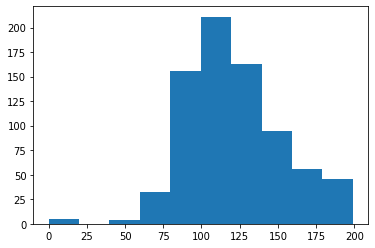

In [ ]:
#Glucose before converting 0 to mean
plt.hist(load_data['Glucose'])
print("Mean of Glucose level is :-", load_data['Glucose'].mean())
print("Datatype of Glucose Variable is:",load_data['Glucose'].dtypes)


Here, we treated the 0 value as null value & have to replace with mean() for Gloucose column.

In [ ]:
load_data['Glucose'].replace(to_replace = 0, value = load_data['Glucose'].mean(), inplace=True)

In [ ]:
# how many 0 value are present inside Glucose column.
after_count =(load_data['Glucose']==0).sum()
after_count

0

Mean of Glucose level is :- 121.68160502115886
Datatype of Glucose Variable is: float64


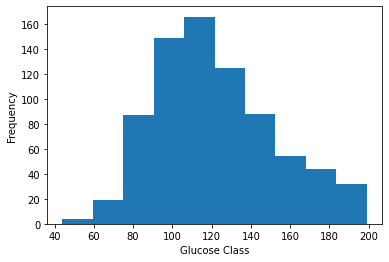

In [ ]:
# #After converting 0 values to mean for the Glucose & plot its histogram.
plt.figure(figsize=(6,4))
plt.xlabel('Glucose Class')
load_data['Glucose'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of Glucose level is :-", load_data['Glucose'].mean())
print("Datatype of Glucose Variable is:",load_data['Glucose'].dtypes)

In [ ]:
# how many 0 value are present inside Glucose column.
BloodPressure_before_count =(load_data['BloodPressure']==0).sum()
BloodPressure_before_count

35

Mean of BloodPressure level is :- 69.10546875
Datatype of BloodPressure Variable is: int64


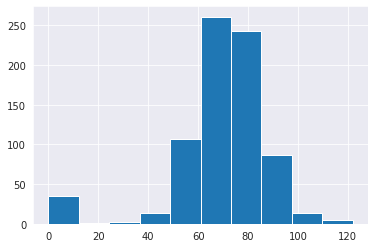

In [ ]:
#BloodPressure before converting 0 to mean
plt.hist(load_data['BloodPressure'])
print("Mean of BloodPressure level is :-", load_data['BloodPressure'].mean())
print("Datatype of BloodPressure Variable is:",load_data['BloodPressure'].dtypes)

In [ ]:
#check BloodPressure after replace 0 value.
BloodPressure_after_count =(load_data['BloodPressure']==0).sum()
BloodPressure_after_count

35

Here, we treated the 0 value as null value & have to replace with mean() for Gloucose column.BloodPressure:

In [ ]:
load_data['BloodPressure'].replace(to_replace = 0, value = load_data['BloodPressure'].mean(), inplace=True)

Mean of BloodPressure level is :- 72.25480651855469
Datatype of BloodPressure Variable is: float64


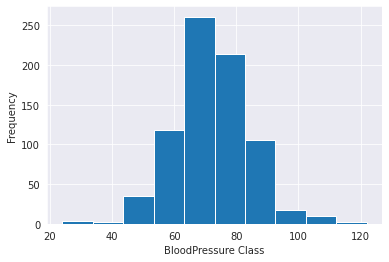

In [ ]:
#After converting 0 values to mean for the BloodPressure & plot its histogram.
plt.figure(figsize=(6,4))
plt.xlabel('BloodPressure Class')
load_data['BloodPressure'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of BloodPressure level is :-", load_data['BloodPressure'].mean())
print("Datatype of BloodPressure Variable is:",load_data['BloodPressure'].dtypes)

In [ ]:
#How many 0 columns are present we have to check.
SkinThickness_before_count =(load_data['SkinThickness']==0).sum()
SkinThickness_before_count

227

Mean of SkinThickness level is :- 20.536458333333332
Datatype of SkinThickness Variable is: int64


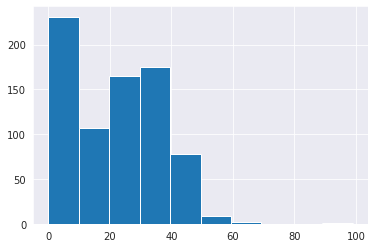

In [ ]:
#SkinThickness before converting 0 to mean
plt.hist(load_data['SkinThickness'])
print("Mean of SkinThickness level is :-", load_data['SkinThickness'].mean())
print("Datatype of SkinThickness Variable is:",load_data['SkinThickness'].dtypes)

Here, we treated the 0 value as null value & have to replace with mean() for Gloucose column.SkinThickness.

In [ ]:
load_data['SkinThickness'].replace(to_replace = 0, value = load_data['SkinThickness'].mean(), inplace=True)

In [ ]:
#How many 0 columns are present we have to check.
SkinThickness_after_count =(load_data['SkinThickness']==0).sum()
SkinThickness_after_count

0

Mean of SkinThickness is :- 26.606479220920136
Datatype of SkinThickness Variable is: float64


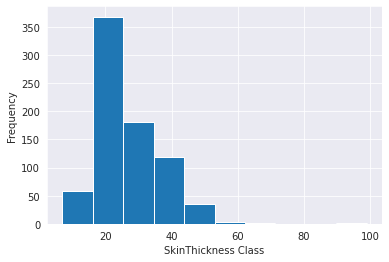

In [ ]:
#After converting 0 values to mean for the SkinThickness & plot its histogram. 
plt.figure(figsize=(6,4))
plt.xlabel('SkinThickness Class')
load_data['SkinThickness'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of SkinThickness is :-", load_data['SkinThickness'].mean())
print("Datatype of SkinThickness Variable is:",load_data['SkinThickness'].dtypes)

In [ ]:
#How many 0 columns are present we have to check.
Insulin_before_count =(load_data['Insulin']==0).sum()
Insulin_before_count

374

Mean of Insulin level is :- 79.79947916666667
Datatype of Insulin Variable is: int64


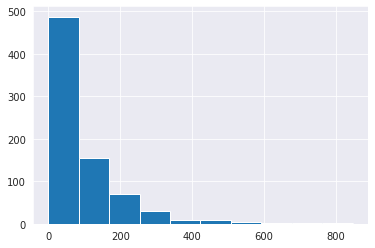

In [ ]:
#Insulin before converting 0 to mean
plt.hist(load_data['Insulin'])
print("Mean of Insulin level is :-", load_data['Insulin'].mean())
print("Datatype of Insulin Variable is:",load_data['Insulin'].dtypes)

Here, we treated the 0 value as null value & have to replace with mean() for Gloucose column.Insulin.

In [ ]:
load_data['Insulin'].replace(to_replace = 0, value = load_data['Insulin'].mean(), inplace=True)

In [ ]:
#How many 0 columns are present we have to check.
Insulin_after_count =(load_data['Insulin']==0).sum()
Insulin_after_count

0

Mean of Insulin is :- 118.66016303168404
Datatype of Insulin Variable is: float64


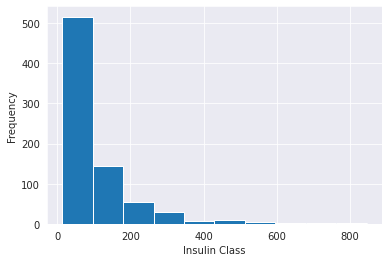

In [ ]:
##After converting 0 values to mean for the Insulin & plot its histogram.
plt.figure(figsize=(6,4))
plt.xlabel('Insulin Class')
load_data['Insulin'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of Insulin is :-", load_data['Insulin'].mean())
print("Datatype of Insulin Variable is:",load_data['Insulin'].dtypes)

In [ ]:
#How many 0 columns are present we have to check.
BMI_before_count =(load_data['BMI']==0).sum()
BMI_before_count

11

Mean of BMI level is :- 31.992578124999998
Datatype of BMI Variable is: float64


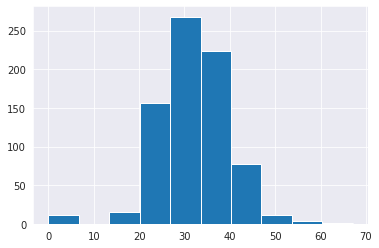

In [ ]:
#BMI before converting 0 to mean
plt.hist(load_data['BMI'])
print("Mean of BMI level is :-", load_data['BMI'].mean())
print("Datatype of BMI Variable is:",load_data['BMI'].dtypes)

Here, we treated the 0 value as null value & have to replace with mean() for BMI column.

In [ ]:
load_data['BMI'].replace(to_replace = 0, value = load_data['BMI'].mean(), inplace=True)

In [ ]:
#How many 0 columns are present we have to check.
BMI_after_count =(load_data['BMI']==0).sum()
BMI_after_count

0

Mean of BMI is :- 32.4508051554362
Datatype of BMI Variable is: float64


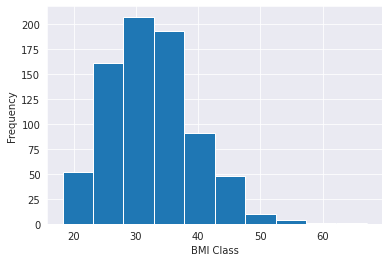

In [ ]:
##After converting 0 values to mean for the BMI & plot its histogram.
plt.figure(figsize=(6,4))
plt.xlabel('BMI Class')
load_data['BMI'].plot.hist()
sns.set_style(style='darkgrid')
print("Mean of BMI is :-", load_data['BMI'].mean())
print("Datatype of BMI Variable is:",load_data['BMI'].dtypes)

In [ ]:
#Before going to deep dive for any analysis we have to create backup for our dataset with some modifications, 
#so later it could not be hampared.
load_data_bkp = load_data.copy()
load_data_bkp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [ ]:
#doing for every Glucose
load_data['Glucose'].value_counts().head(7)

99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
106.0    14
112.0    13
Name: Glucose, dtype: int64

In [ ]:
#value counts for BloodPressure
load_data['BloodPressure'].value_counts().head(7)


70.0    57
74.0    52
78.0    45
68.0    45
72.0    44
64.0    43
80.0    40
Name: BloodPressure, dtype: int64

In [ ]:
#value counts for BMI
load_data['BMI'].value_counts().head(7)


32.000000    13
31.600000    12
31.200000    12
31.992578    11
32.400000    10
33.300000    10
30.100000     9
Name: BMI, dtype: int64

In [ ]:
#value counts for SkinThickness
load_data['SkinThickness'].value_counts().head(7)

20.536458    227
32.000000     31
30.000000     27
27.000000     23
23.000000     22
33.000000     20
28.000000     20
Name: SkinThickness, dtype: int64

In [ ]:
#value counts for Insulin
load_data['Insulin'].value_counts().head(7)


79.799479     374
105.000000     11
130.000000      9
140.000000      9
120.000000      8
94.000000       7
180.000000      7
Name: Insulin, dtype: int64

**Checking Missing value with heatMap**

**Exploratory Data Analysis**

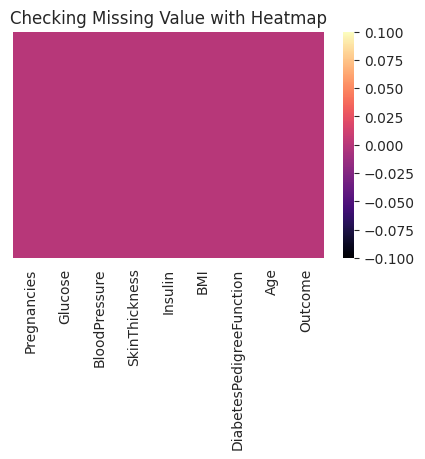

In [ ]:
#checking Missing value with heatmap
plt.figure(figsize=(5,3),dpi=100)
plt.title('Checking Missing Value with Heatmap')
sns.heatmap(load_data.isnull(),cmap='magma',yticklabels=False)

**Count Plot**

Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

Count of class is:
 0    500
1    268
Name: Outcome, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


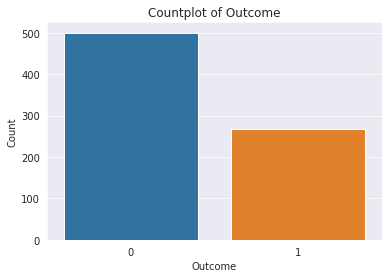

In [ ]:
#create the count plot
sns.set_style('darkgrid')
sns.countplot(load_data['Outcome'])
plt.title("Countplot of Outcome")
plt.xlabel('Outcome')
plt.ylabel("Count")
print("Count of class is:\n",load_data['Outcome'].value_counts())

**Describe the finding**

We can see that both class is balanced so we need not to perform any sampling method to maintain the balance between both classes. Therefor directly using this data in training and testing purpose without performing any sampling method. Meanwhile during Model Validation , we also need not worry about ROC Curve because data is not imbalanced, but as this is a healthcare data so I will be using ROC curve to make sure TYPE 2 ERROR will not be there.

**Scatter Plot**

Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

Text(0.5, 1.0, 'Scatter plot between all variables')

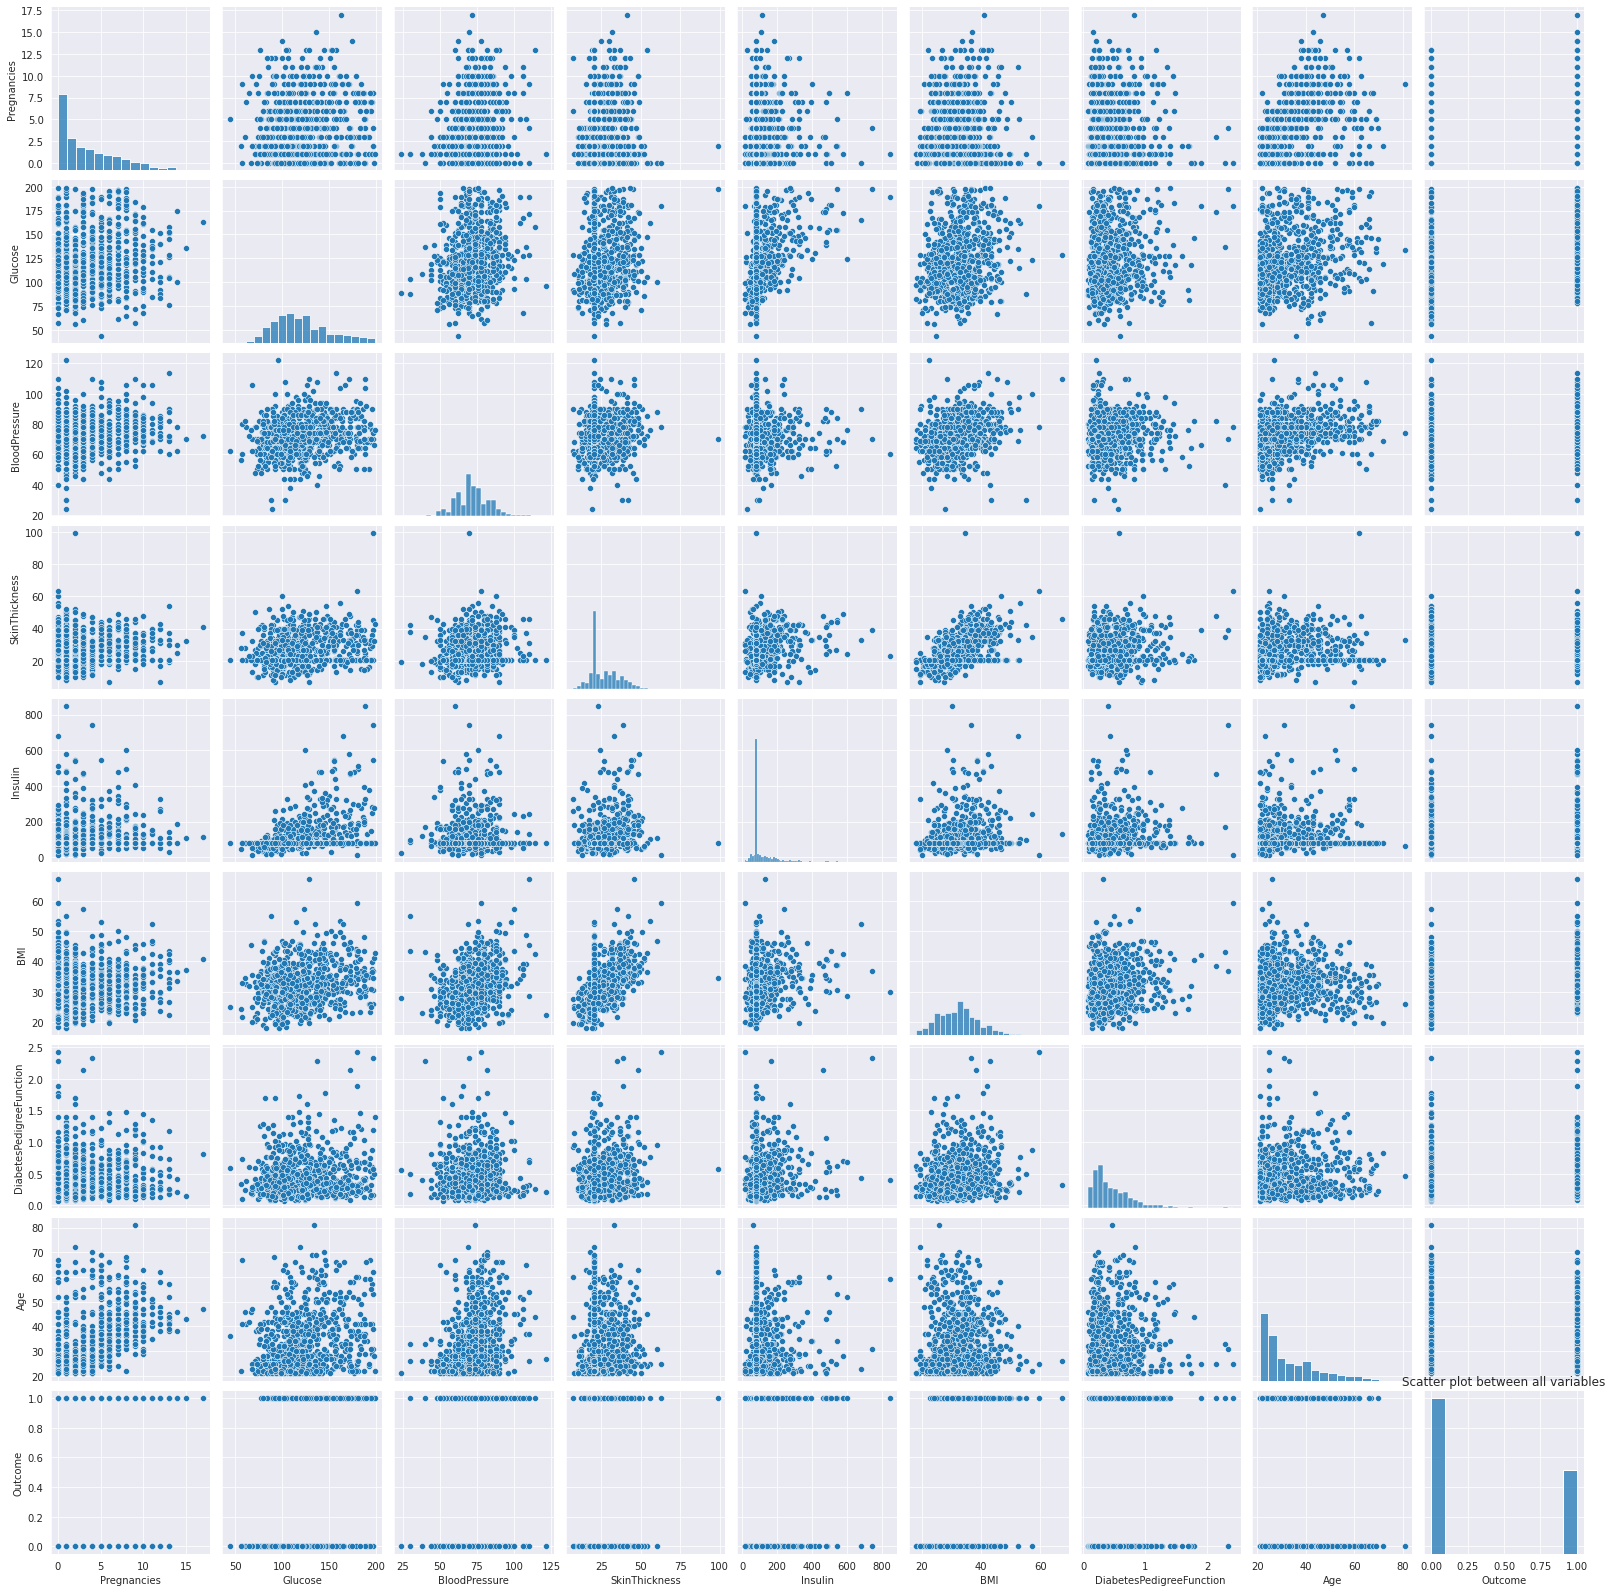

In [ ]:
sns.pairplot(load_data)
plt.title('Scatter plot between all variables')

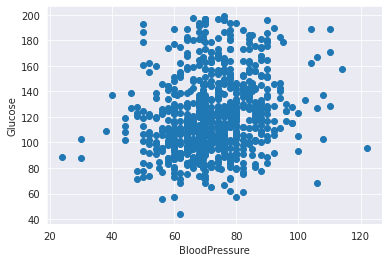

In [ ]:
#creating a scatter plot
plt.scatter(load_data['BloodPressure'], load_data['Glucose'])
plt.xlabel("BloodPressure") #x label
plt.ylabel("Glucose") #y label
plt.show()

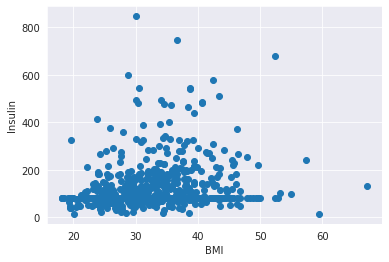

In [ ]:
#creating a scatter plot
plt.scatter(load_data['BMI'], load_data['Insulin'])
plt.xlabel("BMI") #x label
plt.ylabel("Insulin") #y label
plt.show()

In [ ]:
load_data.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Correlation Analysis**

In [ ]:
load_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


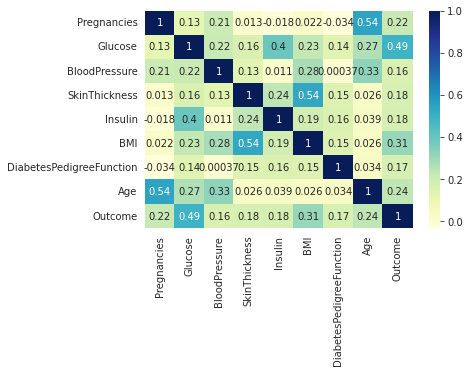

In [ ]:
import seaborn as sb
sb.heatmap(load_data.corr(), cmap="YlGnBu", annot=True)

**Different theme co-relation analysis through heat-map**

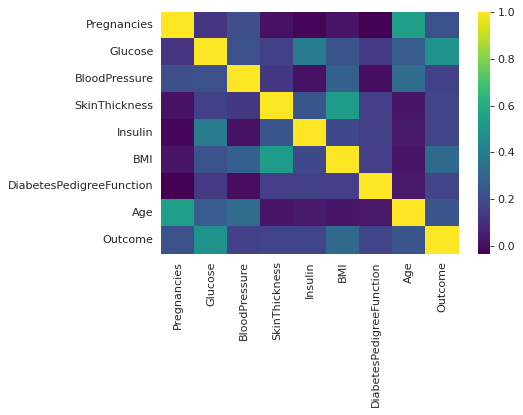

In [ ]:
plt.figure(dpi=80)
sns.heatmap(load_data.corr(),cmap='viridis')

**Data Modelling ( Project Work- week 2 )**


*Data Preprocessing work starting*

In [ ]:
#loc is label-based, which means that you have to specify rows and 
#columns based on their row and column labels.
X=load_data.iloc[:,:-1].values
y=load_data.iloc[:,-1].values

In [ ]:
#now we have import train test split from sklearn.model_selection
#now split our dataset into 80% training and 20% testing & 
#random state is treated as hyperparameter which control the
#shuffing process.
#With random_state=0 , we get the same train and test sets across different executions. 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
#now we have to know how many rows and columns are present in train and test data set.
print(f"X_train shape value determinates",X_train.shape)
print(f"X_test shape value determinates",X_test.shape)
print(f"y_train shape value determinates",y_train.shape)
print(f"y_test shape value determinates",y_test.shape)

X_train shape value determinates (614, 8)
X_test shape value determinates (154, 8)
y_train shape value determinates (614,)
y_test shape value determinates (154,)


In [ ]:
#StandardScaler() function to standardize the data values into a standard format.
#so we import standardScaler from sklearn pre-processing library.
# it helps to standardize data valies into standard format.
from sklearn.preprocessing import StandardScaler


In [ ]:
#now we have to create object from StandardScaler
Scale_value=StandardScaler()
x_train_std=Scale_value.fit_transform(X_train)
x_test_std=Scale_value.transform(X_test)

In [ ]:
#A lambda function is a small anonymous function. A lambda function can 
#take any number of arguments, but can only have one expression.
norm_v=lambda a:(a-min(a))/(max(a)-min(a))

In [ ]:
df_norm=load_data.iloc[:,:-1]

In [ ]:
df_normalized=df_norm.apply(norm_v)

In [ ]:
X_train_norm,X_test_norm,y_train_norm,y_test_norm=train_test_split(df_normalized.values,y,test_size=0.20,random_state=0)

In [ ]:
print(f"X_train norm shape value determinates",X_train_norm.shape)
print(f"X_test norm shape value determinates",X_test_norm.shape)
print(f"y_train norm shape value determinates",y_train_norm.shape)
print(f"y_test norm shape value determinates",y_test_norm.shape)


X_train norm shape value determinates (614, 8)
X_test norm shape value determinates (154, 8)
y_train norm shape value determinates (614,)
y_test norm shape value determinates (154,)


**Various Model Building Steps**

K-Nearest Neighbor(KNN) Algorithm

In [ ]:
#Now time to import KNeighborsClassifier and Predict
from sklearn.neighbors import KNeighborsClassifier
knn_model_value = KNeighborsClassifier(n_neighbors=25) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model_value.fit(x_train_std,y_train)
knn_pred=knn_model_value.predict(x_test_std)

In [ ]:
knn_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#first we have to import metrics
from sklearn import metrics

Model Validation ==>

Accuracy-Score of KNN Model::
0.8181818181818182

 Classification Report::
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       107
           1       0.73      0.64      0.68        47

    accuracy                           0.82       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.82      0.81       154
 


 ROC Curve


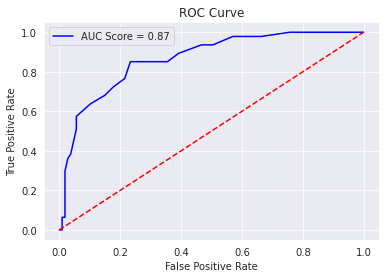

In [ ]:
print("Model Validation ==>\n")
print("Accuracy-Score of KNN Model::")
print(metrics.accuracy_score(y_test,knn_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,knn_pred),'\n')
print("\n","ROC Curve")
knn_prob=knn_model_value.predict_proba(x_test_std)
knn_prob1=knn_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,knn_prob1)
roc_auc_knn=metrics.auc(fpr,tpr)
#plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

**KNN With Normalization**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_norm = KNeighborsClassifier(n_neighbors=25) 
#Using 25 Neighbors just as thumb rule sqrt of observation
knn_model_norm.fit(X_train_norm,y_train_norm)
knn_pred_norm=knn_model_norm.predict(X_test_norm)

In [ ]:
knn_pred_norm

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Model Validation ==>

Accuracy Score of KNN Model with Normalization::
0.8311688311688312

 Classification Report::
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       107
           1       0.74      0.68      0.71        47

    accuracy                           0.83       154
   macro avg       0.80      0.79      0.80       154
weighted avg       0.83      0.83      0.83       154
 


 ROC Curve


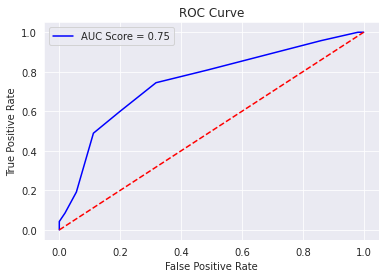

In [ ]:
print("Model Validation ==>\n")
print("Accuracy Score of KNN Model with Normalization::")
print(metrics.accuracy_score(y_test_norm,knn_pred_norm))
print("\n","Classification Report::")
print(metrics.classification_report(y_test_norm,knn_pred_norm),'\n')
print("\n","ROC Curve")
knn_prob_norm=knn_model_value.predict_proba(X_test_norm)
knn_prob_norm1=knn_prob_norm[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test_norm,knn_prob_norm1)
roc_auc_knn=metrics.auc(fpr,tpr)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_knn)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

**Logistic Regression**

In [ ]:
#import Logistic Regression and tried to building a model.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr_model_classifier = LogisticRegression(C=0.01) 
lr_model_classifier.fit(x_train_std,y_train)
lr_pred=lr_model_classifier.predict(x_test_std)

**From the below code we can got output for Model Accuracy, classification report, confusion Matrix & ROC curve**



Model Validation ==>

Accuracy Score of Logistic Regression Model::
0.8116883116883117

 Classification Report::
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       107
           1       0.78      0.53      0.63        47

    accuracy                           0.81       154
   macro avg       0.80      0.73      0.75       154
weighted avg       0.81      0.81      0.80       154
 


 Confusion Matrix::
[[100   7]
 [ 22  25]]

 ROC Curve


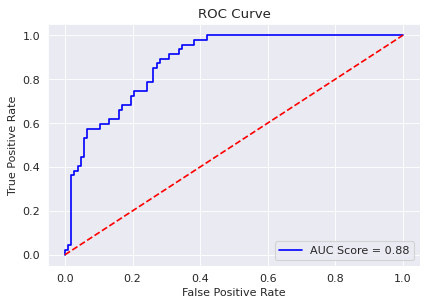

In [ ]:
#from the below code we can got output for Model Accuracy, classification report, confusion Matrix & ROC curve
print("Model Validation ==>\n")
print("Accuracy Score of Logistic Regression Model::")
print(metrics.accuracy_score(y_test,lr_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,lr_pred),'\n')
print("\n","Confusion Matrix::")
cm = confusion_matrix(y_test,lr_pred,labels=None)
print(cm)
print("\n","ROC Curve")
lr_prob=lr_model_classifier.predict_proba(x_test_std)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

**Decesion Tress Classifier**

In [ ]:
#import Decesion Tree Classifier and tried to building a model.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
dtc_model_classifier = DecisionTreeClassifier() 
dtc_model_classifier.fit(x_train_std,y_train)
dtc_pred=dtc_model_classifier.predict(x_test_std)

**From the below code we can got output for Model Accuracy, classification report, confusion Matrix & ROC curve**

Model Validation ==>

Accuracy Score of Decesion Tree Classfier Model::
0.7402597402597403

 Classification Report::
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       107
           1       0.57      0.64      0.60        47

    accuracy                           0.74       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.75      0.74      0.74       154
 


 Confusion Matrix::
[[84 23]
 [17 30]]

 ROC Curve


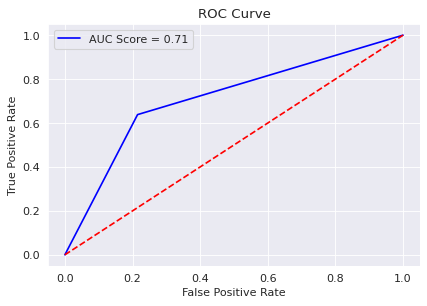

In [ ]:
print("Model Validation ==>\n")
print("Accuracy Score of Decesion Tree Classfier Model::")
print(metrics.accuracy_score(y_test,dtc_pred))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,dtc_pred),'\n')
print("\n","Confusion Matrix::")
cm = confusion_matrix(y_test,dtc_pred,labels=None)
print(cm)
print("\n","ROC Curve")
lr_prob=dtc_model_classifier.predict_proba(x_test_std)
lr_prob1=lr_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,lr_prob1)
roc_auc_lr=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_lr)
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

**Random Forest Classifier**

In [ ]:
#Import Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
rf_model_classifier = RandomForestClassifier(n_estimators=1000,random_state=0)
rf_model_classifier.fit(x_train_std,y_train)
rf_pred_classifier=rf_model_classifier.predict(x_test_std)

**From the below code we can got output for Model Accuracy, classification report, confusion Matrix & ROC curve**

Model Validation ==>

Accuracy Score of Random Forest Classifier Model::
0.8246753246753247

 Classification Report::
              precision    recall  f1-score   support

           0       0.88      0.87      0.87       107
           1       0.71      0.72      0.72        47

    accuracy                           0.82       154
   macro avg       0.79      0.80      0.79       154
weighted avg       0.83      0.82      0.83       154
 


 Confusion Matrix::
[[93 14]
 [13 34]]

 ROC Curve


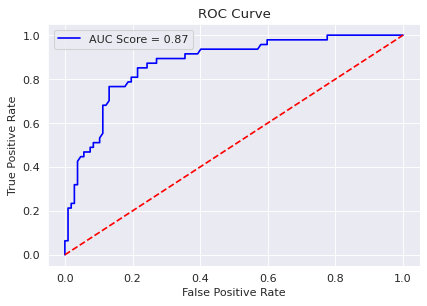

In [ ]:
print("Model Validation ==>\n")
print("Accuracy Score of Random Forest Classifier Model::")
print(metrics.accuracy_score(y_test,rf_pred_classifier))
print("\n","Classification Report::")
print(metrics.classification_report(y_test,rf_pred_classifier),'\n')
print("\n","Confusion Matrix::")
cm = confusion_matrix(y_test,rf_pred_classifier,labels=None)
print(cm)
print("\n","ROC Curve")
rf_prob=rf_model_classifier.predict_proba(x_test_std)
rf_prob1=rf_prob[:,1]
fpr,tpr,thresh=metrics.roc_curve(y_test,rf_prob1)
roc_auc_rf=metrics.auc(fpr,tpr)
plt.figure(dpi=80)
plt.plot(fpr,tpr,'b',label='AUC Score = %0.2f'%roc_auc_rf)
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr,fpr,'r--',color='red')
plt.legend()

**we have to export our model and save it to application purpose.**

**JOBLIB**

It is used to export the model for later usecase. so i have one model ready for Logistic Regression, So we have to export that model.

In [ ]:
import joblib

In [ ]:
#working exporter for KNN
export_path = "/content/export_model/"
filename="knn_model_view.sav"
joblib.dump(knn_model_value, export_path+ filename)

['/content/export_model/knn_model_view.sav']

**Testing the Prediction with the same model (KNN) which was exported**:

In [ ]:
filename=export_path+"knn_model_view.sav"
joblib.dump(knn_model_value, filename)

['/content/export_model/knn_model_view.sav']

In [ ]:
knn_model = joblib.load(filename)
load_model_after_export= knn_model.predict(x_test_std)
old_knn_model= knn_model_value.predict(x_test_std)
#print(load_model_after_export)
#print(old_knn_model)
print("Before and after Model is matched or not ================")
np.array_equal(old_knn_model,load_model_after_export)

Before and after Model is matched or not ================


True

In [ ]:
#working exporter for Logistic_Regression
export_path = "/content/export_model/"
filename="Logistic_Regression_model_view.sav"
joblib.dump(lr_model_classifier, export_path+ filename)

['/content/export_model/Logistic_Regression_model_view.sav']

**Testing the Prediction with the same model (Logistic_Regression) which was exported**:

In [ ]:
filename=export_path+"Logistic_Regression_model_view.sav"
lr_model = joblib.load(filename)
load_model_after_export_lr= lr_model.predict(x_test_std)
old_lr_model= lr_model_classifier.predict(x_test_std)
#print(load_model_after_export_lr)
#print(old_lr_model)
print("Before and after Model is matched or not ================")
np.array_equal(old_lr_model,load_model_after_export_lr)

Before and after Model is matched or not ================


True

In [ ]:
#working exporter for Decesion Tree Model
export_path = "/content/export_model/"
filename="Decesion_Tree_model_view.sav"
joblib.dump(dtc_model_classifier, export_path+ filename)

['/content/export_model/Decesion_Tree_model_view.sav']

**Testing the Prediction with the same model (Decesion Tree) which was exported**:

In [ ]:
filename=export_path+"Decesion_Tree_model_view.sav"
dt_model = joblib.load(filename)
load_model_after_export_dt= dt_model.predict(x_test_std)
old_dt_model= dtc_model_classifier.predict(x_test_std)
#print(load_model_after_export_dt)
#print(old_dt_model)
print("Before and after Model is matched or not ================")
np.array_equal(old_dt_model,load_model_after_export_dt)

Before and after Model is matched or not ================


True

In [ ]:
#working exporter for Random Forest Model
export_path = "/content/export_model/"
filename="Random_Forest_model_view.sav"
joblib.dump(rf_model_classifier, export_path+ filename)

['/content/export_model/Random_Forest_model_view.sav']

**Testing the Prediction with the same model (Random Forest) which was exported**:

In [ ]:
#Random Forest Classifier model checking

filename=export_path+"Random_Forest_model_view.sav"
rf_clasifier_model = joblib.load(filename)
load_model_after_export_rf= rf_clasifier_model.predict(x_test_std)
old_rf_model= rf_model_classifier.predict(x_test_std)
#print(load_model_after_export_dt)
#print(old_dt_model)
print("Before and after Model is matched or not ================")
np.array_equal(old_rf_model,load_model_after_export_rf)

Before and after Model is matched or not ================


True